In [79]:
using Trixi
using LinearAlgebra
using OrdinaryDiffEq

advection_velocity = 1.0
equations = LinearScalarAdvectionEquation1D(advection_velocity)

surface_flux = FluxLaxFriedrichs()
dg = DGMulti(polydeg = 3,
             element_type = Line(),
             approximation_type = GaussSBP(),
             surface_integral = SurfaceIntegralWeakForm(surface_flux),
             volume_integral = VolumeIntegralWeakForm())

cells_per_dimension = (8,)
mesh = DGMultiMesh(dg, cells_per_dimension,
                   coordinates_min = (-1.0,), coordinates_max = (1.0,),
                   periodicity = true)

initial_condition = initial_condition_convergence_test

semi = SemidiscretizationHyperbolic(mesh,
                                    equations,
                                    initial_condition,
                                    dg)

tspan = (0.0, 1.5)
ode = semidiscretize(semi, tspan)

ODEProblem with uType StructArray{SVector{1, Float64}, 2, Tuple{Matrix{Float64}}, Int64} and tType Float64. In-place: true
timespan: (0.0, 1.5)
u0: 4×8 StructArray(::Matrix{Float64}) with eltype SVector{1, Float64}:
 [1.00003]   [0.646547]  [0.500107]  …  [1.35345]  [1.49989]  [1.3535]
 [0.892303]  [0.578576]  [0.511713]     [1.42142]  [1.48829]  [1.26912]
 [0.730882]  [0.511713]  [0.578576]     [1.48829]  [1.42142]  [1.1077]
 [0.646498]  [0.500107]  [0.646547]     [1.49989]  [1.35345]  [0.999965]

In [81]:
# The initial condition (corresponding to the evaluation at the Gauss-Legendre nodes) that I want to pass
u0_discrete = randn(polydeg+1,cells_per_dimension[1]);

# We map it to the Lobatto-Legendre nodes by applying dg.basis.Pq
u0_discrete .= dg.basis.Pq*u0_discrete

# Building empty array with type StructArray
u0_ode = Trixi.allocate_coefficients(Trixi.mesh_equations_solver_cache(semi)...)

# We want to populate the entries of u0_ode with u0_discrete

4×8 StructArray(::Matrix{Float64}) with eltype SVector{1, Float64}:
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]

In [85]:
# Building empty array with type StructArray
u0_ode = Trixi.allocate_coefficients(Trixi.mesh_equations_solver_cache(semi)...)

for i in eachindex(u0_ode)
    u0_ode[i] = SVector(u0_discrete[i])
end

In [86]:
remake(ode, u0 = u0_ode)

ODEProblem with uType StructArray{SVector{1, Float64}, 2, Tuple{Matrix{Float64}}, Int64} and tType Float64. In-place: true
timespan: (0.0, 1.5)
u0: 4×8 StructArray(::Matrix{Float64}) with eltype SVector{1, Float64}:
 [2.71114]    [-2.90224]   …  [2.31865]   [2.04747]    [1.09534]
 [-0.452064]  [0.184219]      [-1.04729]  [-0.879804]  [0.679321]
 [0.602025]   [-1.12619]      [0.808203]  [1.14126]    [-1.25709]
 [-0.788669]  [-0.731427]     [-2.31092]  [-1.12509]   [1.07056]

In [87]:
convert(Matrix{Float64}, u0_ode)

LoadError: MethodError: [0mCannot `convert` an object of type [92mSVector{1, Float64}[39m[0m to an object of type [91mFloat64[39m

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::VectorizationBase.AbstractSIMD[39m) where T<:Union{Bool, Float16, Float32, Float64, Int16, Int32, Int64, Int8, UInt16, UInt32, UInt64, UInt8, SIMDTypes.Bit}
[0m[90m   @[39m [36mVectorizationBase[39m [90m~/.julia/packages/VectorizationBase/6AO0m/src/[39m[90m[4mbase_defs.jl:201[24m[39m
[0m  convert(::Type{T}, [91m::Number[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:7[24m[39m
[0m  convert(::Type{T}, [91m::T[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:6[24m[39m
[0m  ...


In [57]:
convert(StructArray{SVector{1, Float64}, 2, Tuple{Matrix{Float64}}, Int64}, u0_discrete)

LoadError: MethodError: [0mCannot `convert` an object of type [92mMatrix{Float64}[39m[0m to an object of type [91mStructArray{SVector{1, Float64}, 2, Tuple{Matrix{Float64}}, Int64}[39m

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T
[0m[90m   @[39m [90mBase[39m [90m[4mBase.jl:84[24m[39m
[0m  convert(::Type{T}, [91m::LinearAlgebra.Factorization[39m) where T<:AbstractArray
[0m[90m   @[39m [36mLinearAlgebra[39m [90m/Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4mfactorization.jl:108[24m[39m
[0m  convert(::Type{T}, [91m::LinearAlgebra.AbstractQ[39m) where T<:AbstractArray
[0m[90m   @[39m [36mLinearAlgebra[39m [90m/Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/LinearAlgebra/src/[39m[90m[4mabstractq.jl:45[24m[39m
[0m  ...


In [44]:
# Elegant way of buiding an empty array
u_ode = Trixi.allocate_coefficients(Trixi.mesh_equations_solver_cache(semi)...)

In [54]:
# How to transform back and forth from Matrix{Float64} to StructArray(::Matrix{Float64}) with eltype SVector{1, Float64}

  0.000031 seconds (26 allocations: 2.219 KiB)


4×8 StructArray(::Matrix{Float64}) with eltype SVector{1, Float64}:
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]

In [59]:
ode.u0

4×8 StructArray(::Matrix{Float64}) with eltype SVector{1, Float64}:
 [1.00003]   [0.646547]  [0.500107]  …  [1.35345]  [1.49989]  [1.3535]
 [0.892303]  [0.578576]  [0.511713]     [1.42142]  [1.48829]  [1.26912]
 [0.730882]  [0.511713]  [0.578576]     [1.48829]  [1.42142]  [1.1077]
 [0.646498]  [0.500107]  [0.646547]     [1.49989]  [1.35345]  [0.999965]

In [53]:
u = Trixi.wrap_array_native(u_ode, semi)

4×8 StructArray(::Matrix{Float64}) with eltype SVector{1, Float64}:
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]

In [26]:
using Trixi

equations = InviscidBurgersEquation1D()

surface_flux = flux_lax_friedrichs
volume_flux = flux_ec

polydeg = 3
basis = DGMultiBasis(Line(), polydeg, approximation_type = GaussSBP())

indicator_sc = IndicatorHennemannGassner(equations, basis,
                                         alpha_max = 0.5,
                                         alpha_min = 0.001,
                                         alpha_smooth = true,
                                         variable = first)

volume_integral = VolumeIntegralShockCapturingHG(indicator_sc;
                                                 volume_flux_dg = volume_flux,
                                                 volume_flux_fv = surface_flux)

dg = DGMulti(basis,
             surface_integral = SurfaceIntegralWeakForm(surface_flux),
             volume_integral = volume_integral)

###############################################################################
#  setup the 1D mesh

cells_per_dimension = (64,)
mesh = DGMultiMesh(dg, cells_per_dimension,
                   coordinates_min = (-1.0,), coordinates_max = (1.0,),
                   periodicity = true)

semi = SemidiscretizationHyperbolic(mesh,
                                    equations,
                                    initial_condition_convergence_test,
                                    dg)
tspan = (0.0, 2.0)
ode = semidiscretize(semi, tspan)

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ SemidiscretizationHyperbolic                                                                     │
│ ════════════════════════════                                                                     │
│ #spatial dimensions: ………………………… 1                                                                │
│ mesh: ………………………………………………………………… Trixi.Affine DGMultiMesh with NDIMS = 1.                         │
│ equations: …………………………………………………… InviscidBurgersEquation1D                                        │
│ initial condition: ……………………………… initial_condition_convergence_test                               │
│ boundary conditions: ………………………… Trixi.BoundaryConditionPeriodic                                  │
│ source terms: …………………………………………… nothing                                                          │
│ solver: …………………………………………………………… DG                                                       

In [27]:
zero(compute_coefficients(1.0, semi))

4×64 StructArray(::Matrix{Float64}) with eltype SVector{1, Float64}:
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]  …  [0.0]  [0.0]  [0.0]  [0.0]  [0.0]
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]     [0.0]  [0.0]  [0.0]  [0.0]  [0.0]
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]     [0.0]  [0.0]  [0.0]  [0.0]  [0.0]
 [0.0]  [0.0]  [0.0]  [0.0]  [0.0]     [0.0]  [0.0]  [0.0]  [0.0]  [0.0]

In [12]:
u0 = randn((polydeg+1)*cells_per_dimension[1])

320-element Vector{Float64}:
 -0.9065579065485929
  0.12500836000779617
  0.7596775470027295
  0.5023644157719817
  0.3720284068974656
 -0.13788794581499256
  0.1496005168372053
 -0.7672454931432248
  1.0741276523761536
  0.36670561565789395
 -0.35392948609737057
  0.30856729733096955
 -0.4674957081276511
  ⋮
  1.0764386790396767
 -0.03821163188438069
 -1.4669470381448262
  0.7215104958223241
  0.05675931158211016
  1.5212338764342455
  0.8677586757537328
 -1.7571053613863639
 -0.6867076615945235
  0.25034542310518776
  0.9758870795196198
 -0.6480244927355104

In [18]:
tspan = (0.0, 2.0)
ode = semidiscretize(semi, tspan)

ODEProblem with uType StructArray{SVector{1, Float64}, 2, Tuple{Matrix{Float64}}, Int64} and tType Float64. In-place: true
timespan: (0.0, 2.0)
u0: 4×64 StructArray(::Matrix{Float64}) with eltype SVector{1, Float64}:
 [2.0]      [2.19509]  [2.38268]  …  [1.44443]  [1.61732]  [1.80491]
 [2.05424]  [2.248]    [2.43223]     [1.49035]  [1.66799]  [1.8584]
 [2.1416]   [2.33201]  [2.50965]     [1.56777]  [1.752]    [1.94576]
 [2.19509]  [2.38268]  [2.55557]     [1.61732]  [1.80491]  [2.0]

In [25]:
ode.u0

4×64 StructArray(::Matrix{Float64}) with eltype SVector{1, Float64}:
 [2.0]      [2.19509]  [2.38268]  …  [1.44443]  [1.61732]  [1.80491]
 [2.05424]  [2.248]    [2.43223]     [1.49035]  [1.66799]  [1.8584]
 [2.1416]   [2.33201]  [2.50965]     [1.56777]  [1.752]    [1.94576]
 [2.19509]  [2.38268]  [2.55557]     [1.61732]  [1.80491]  [2.0]

In [ ]:
u0_grid = compute_coefficients

In [2]:
compute_coefficients(0.0, mesh)

LoadError: MethodError: no method matching compute_coefficients(::Float64, ::DGMultiMesh{1, Trixi.Affine, StartUpDG.MeshData{1, StartUpDG.VertexMappedMesh{Line, Tuple{Vector{Float64}}, Matrix{Int64}}, Matrix{Float64}, Matrix{Float64}, Matrix{Float64}, Matrix{Int64}, Matrix{Float64}, StaticArraysCore.SMatrix{1, 1, Matrix{Float64}, 1}, Matrix{Float64}, Matrix{Int64}, Matrix{Int64}, Vector{Matrix{Float64}}}, Dict{Symbol, Vector{Int64}}})

[0mClosest candidates are:
[0m  compute_coefficients(::Any, ::Any, [91m::Trixi.AbstractSemidiscretization[39m)
[0m[90m   @[39m [35mTrixi[39m [90m~/.julia/packages/Trixi/kZ2a3/src/semidiscretization/[39m[90m[4msemidiscretization.jl:131[24m[39m
[0m  compute_coefficients(::Any, [91m::SemidiscretizationEulerAcoustics[39m)
[0m[90m   @[39m [35mTrixi[39m [90m~/.julia/packages/Trixi/kZ2a3/src/semidiscretization/[39m[90m[4msemidiscretization_euler_acoustics.jl:160[24m[39m
[0m  compute_coefficients(::Any, [91m::PolynomialBases.NodalBasis{PolynomialBases.Line}[39m)
[0m[90m   @[39m [36mPolynomialBases[39m [90m~/.julia/packages/PolynomialBases/X2X4i/src/[39m[90m[4mnodal_bases.jl:50[24m[39m
[0m  ...


In [6]:
using Revise
using HierarchicalDA
using LinearAlgebra
using OrdinaryDiffEq
using Trixi
using FFTW
using DifferentialEquations

In [7]:
using CairoMakie
using LaTeXStrings
# using Plots

In [24]:
semi.initial_condition

initial_condition_convergence_test (generic function with 24 methods)

In [25]:
equations = InviscidBurgersEquation1D()

###############################################################################
# setup the GSBP DG discretization that uses the Gauss operators from 
# Chan, Del Rey Fernandez, Carpenter (2019). 
# [https://doi.org/10.1137/18M1209234](https://doi.org/10.1137/18M1209234)

surface_flux = flux_lax_friedrichs
volume_flux = flux_ec

polydeg = 4
basis = DGMultiBasis(Line(), polydeg, approximation_type = GaussSBP())

indicator_sc = IndicatorHennemannGassner(equations, basis,
                                         alpha_max = 0.5,
                                         alpha_min = 0.001,
                                         alpha_smooth = true,
                                         variable = first)

volume_integral = VolumeIntegralShockCapturingHG(indicator_sc;
                                                 volume_flux_dg = volume_flux,
                                                 volume_flux_fv = surface_flux)

dg = DGMulti(basis,
             surface_integral = SurfaceIntegralWeakForm(surface_flux),
             volume_integral = volume_integral)

###############################################################################
#  setup the 1D mesh

cells_per_dimension = (64,)
mesh = DGMultiMesh(dg, cells_per_dimension,
                   coordinates_min = (-1.0,), coordinates_max = (1.0,),
                   periodicity = true)

###############################################################################
#  setup the semidiscretization and ODE problem

semi = SemidiscretizationHyperbolic(mesh,
                                    equations,
                                    initial_condition_convergence_test,
                                    dg)

tspan = (0.0, 2.0)
ode = semidiscretize(semi, tspan)

###############################################################################
#  setup the callbacks

# prints a summary of the simulation setup and resets the timers
summary_callback = SummaryCallback()

# analyse the solution in regular intervals and prints the results
analysis_callback = AnalysisCallback(semi, interval = 100, uEltype = real(dg))

# handles the re-calculation of the maximum Δt after each time step
stepsize_callback = StepsizeCallback(cfl = 0.5)

# collect all callbacks such that they can be passed to the ODE solver
callbacks = CallbackSet(summary_callback, analysis_callback, stepsize_callback)

# ###############################################################################
# # run the simulation

sol = solve(ode, SSPRK43(), #CarpenterKennedy2N54(williamson_condition = false),
            dt = 1.0, save_everystep = false, callback = callbacks);


████████╗██████╗ ██╗██╗  ██╗██╗
╚══██╔══╝██╔══██╗██║╚██╗██╔╝██║
   ██║   ██████╔╝██║ ╚███╔╝ ██║
   ██║   ██╔══██╗██║ ██╔██╗ ██║
   ██║   ██║  ██║██║██╔╝ ██╗██║
   ╚═╝   ╚═╝  ╚═╝╚═╝╚═╝  ╚═╝╚═╝

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ SemidiscretizationHyperbolic                                                                     │
│ ════════════════════════════                                                                     │
│ #spatial dimensions: ………………………… 1                                                                │
│ mesh: ………………………………………………………………… Trixi.Affine DGMultiMesh with NDIMS = 1.                         │
│ equations: …………………………………………………… InviscidBurgersEquation1D                                        │
│ initial condition: ……………………………… initial_condition_convergence_test                               │
│ boundary conditions: ………………………… Trixi.BoundaryConditionPeriodic                                  

────────────────────────────────────────────────────────────────────────────────────────────────────
 Simulation running 'InviscidBurgersEquation1D' with DGMulti(polydeg=4)
────────────────────────────────────────────────────────────────────────────────────────────────────
 #timesteps:                300                run time:       4.16988330e-02 s
 Δt:             1.24903301e-03                └── GC time:    0.00000000e+00 s (0.000%)
 sim. time:      4.03390002e-01 (20.170%)      time/DOF/rhs!:  7.68451247e-08 s
                                               PID:            7.94776918e-08 s
 #DOFs per field:           320                alloc'd memory:        393.078 MiB
 #elements:                  64

 Variable:       scalar        
 L2 error:       1.09398416e+00
 Linf error:     1.63788188e+00
 ∑∂S/∂U ⋅ Uₜ :  -1.10171072e-02
────────────────────────────────────────────────────────────────────────────────────────────────────


───────────────────────────────────────────────────

In [29]:
NodalBasis

LoadError: UndefVarError: `NodalBasis` not defined

In [34]:
compute_coefficient

LoadError: UndefVarError: `compute_coefficient` not defined

In [33]:
?grid(mesh)

No documentation found.

Binding `grid` does not exist.


In [45]:
compute_coefficients(x->1.0, semi)

LoadError: MethodError: no method matching -(::Float64, ::var"#3#4")

[0mClosest candidates are:
[0m  -([91m::ChainRulesCore.NotImplemented[39m, ::Any)
[0m[90m   @[39m [32mChainRulesCore[39m [90m~/.julia/packages/ChainRulesCore/zgT0R/src/[39m[90m[4mtangent_arithmetic.jl:49[24m[39m
[0m  -(::Any, [91m::ChainRulesCore.NotImplemented[39m)
[0m[90m   @[39m [32mChainRulesCore[39m [90m~/.julia/packages/ChainRulesCore/zgT0R/src/[39m[90m[4mtangent_arithmetic.jl:50[24m[39m
[0m  -([91m::ChainRulesCore.NoTangent[39m, ::Any)
[0m[90m   @[39m [32mChainRulesCore[39m [90m~/.julia/packages/ChainRulesCore/zgT0R/src/[39m[90m[4mtangent_arithmetic.jl:61[24m[39m
[0m  ...


In [36]:
?compute_coefficients

search: compute_coefficients



```
compute_coefficients(u, basis::NodalBasis{Line})
```

Compute the nodal values of the function `u` at the nodes corresponding to the nodal basis `basis`.

---

```
compute_coefficients(u, D::AbstractDerivativeOperator)
```

Compute the nodal values of the function `u` at the grid associated to the derivative operator `D`.

---

```
compute_coefficients(func, t, semi::AbstractSemidiscretization)
```

Compute the discrete coefficients of the continuous function `func` at time `t` associated with the semidiscretization `semi`. For example, the discrete coefficients of `func` for a discontinuous Galerkin spectral element method ([`DGSEM`](@ref)) are the values of `func` at the Lobatto-Legendre nodes. Similarly, a classical finite difference method will use the values of `func` at the nodes of the grid assoociated with the semidiscretization `semi`.

For semidiscretizations `semi` associated with an initial condition, `func` can be omitted to use the given initial condition at time `t`.


In [38]:
semi.cache

(md = MeshData{1}, Qrst_skew = (adjoint(sparse([2, 3, 4, 5, 6, 7, 1, 3, 4, 5  …  1, 2, 3, 4, 5, 1, 2, 3, 4, 5], [1, 1, 1, 1, 1, 1, 2, 2, 2, 2  …  6, 6, 6, 6, 6, 7, 7, 7, 7, 7], [1.1422027901609288, -0.5646777230358772, 0.2907280278002025, -0.1307284012760012, -0.7757040245471655, 0.03817933089790645, -1.1422027901609288, 0.9833008862464374, -0.44443449377405486, 0.29072802780020285  …  0.7757040245471655, -0.44657919600005064, 0.2666666666666755, -0.1339708261116981, 0.03817933089790769, -0.03817933089790645, 0.13397082611169417, -0.2666666666666669, 0.4465791960000368, -0.7757040245471568], 7, 7)),), VhP = [1.0000000000000002 3.1449033289128384e-17 … 1.9724672419416234e-17 -3.44915582993122e-17; 2.1326810884783942e-17 1.0 … 2.433373676389946e-17 1.4639551399424828e-17; … ; 1.551408049094331 -0.8931583920001013 … -0.2679416522233962 0.07635866179581538; 0.0763586617958129 -0.26794165222338834 … -0.8931583920000736 1.5514080490943136], Ph = [6.548045607936821 -1.866077916035081 … 12.500

In [41]:
@which compute_coefficients(1.0, semi)

compute_coefficients(t, semi::SemidiscretizationHyperbolic)
     @ Trixi ~/.julia/packages/Trixi/kZ2a3/src/semidiscretization/semidiscretization_hyperbolic.jl:401

In [15]:
semi.mesh.md.xq

5×64 Matrix{Float64}:
 -0.998534  -0.967284  -0.936034  -0.904784  …  0.907716  0.938966  0.970216
 -0.992789  -0.961539  -0.930289  -0.899039     0.913461  0.944711  0.975961
 -0.984375  -0.953125  -0.921875  -0.890625     0.921875  0.953125  0.984375
 -0.975961  -0.944711  -0.913461  -0.882211     0.930289  0.961539  0.992789
 -0.970216  -0.938966  -0.907716  -0.876466     0.936034  0.967284  0.998534

In [39]:
remake(ode, u0 = compute_coefficients(1.0, semi))

ODEProblem with uType StructArray{SVector{1, Float64}, 2, Tuple{Matrix{Float64}}, Int64} and tType Float64. In-place: true
timespan: (0.0, 2.0)
u0: 5×64 StructArray(::Matrix{Float64}) with eltype SVector{1, Float64}:
 [2.0]      [2.19509]  [2.38268]  …  [1.44443]  [1.61732]  [1.80491]
 [2.0339]   [2.22822]  [2.41378]     [1.47293]  [1.64885]  [1.83827]
 [2.09802]  [2.29028]  [2.4714]      [1.5286]   [1.70972]  [1.90198]
 [2.16173]  [2.35115]  [2.52707]     [1.58622]  [1.77178]  [1.9661]
 [2.19509]  [2.38268]  [2.55557]     [1.61732]  [1.80491]  [2.0]

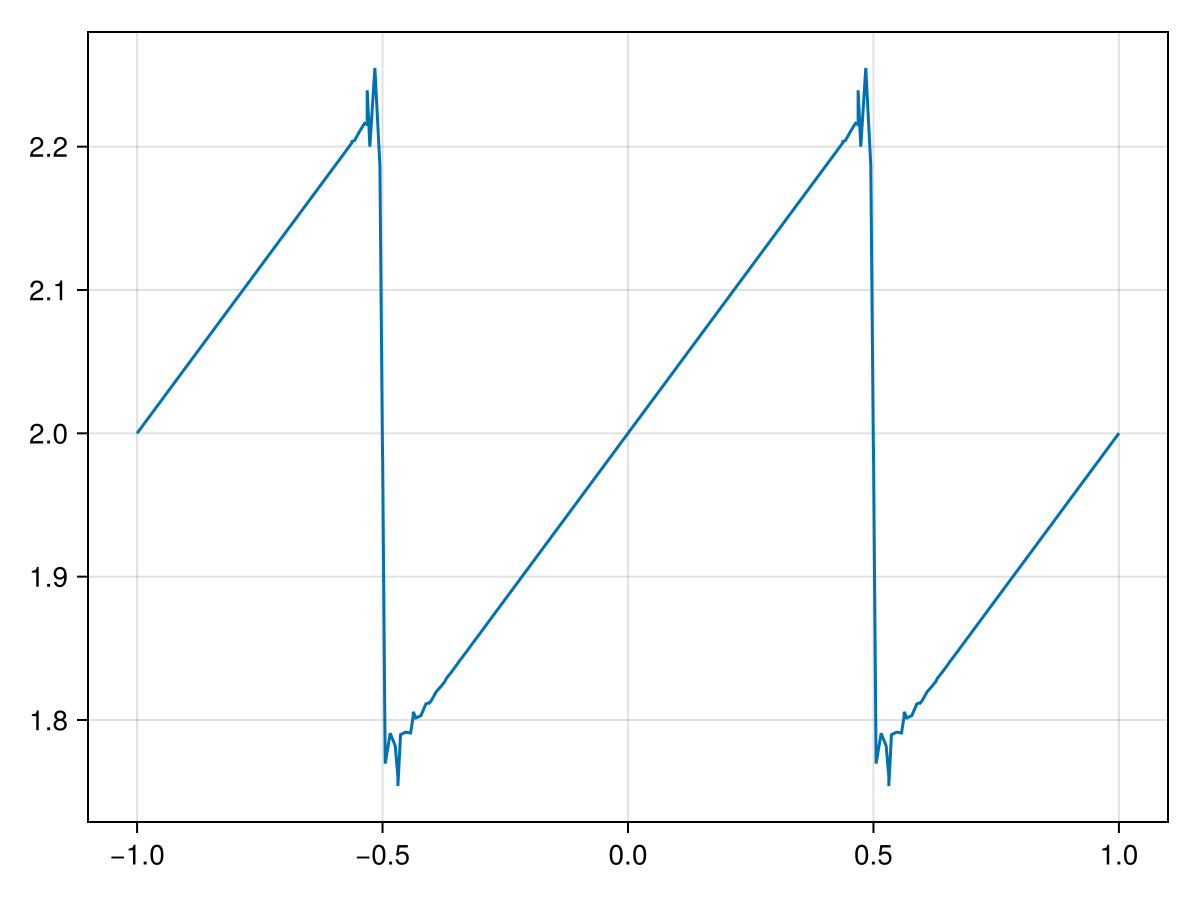

In [78]:
lines(vec(mesh.md.x), map(x-> x[1], vec(sol(2.0))))

In [227]:
# Check that Vq and Pq are the inverse of each other.
dg.basis.Vq*dg.basis.Pq

4×4 Matrix{Float64}:
 1.0           1.29264e-16  -2.54645e-17   2.13649e-17
 3.04002e-17   1.0          -9.7445e-17   -2.58067e-17
 1.19679e-18  -1.81138e-17   1.0           8.67581e-18
 3.34772e-17  -4.43506e-17   1.0683e-17    1.0

In [73]:
# The same setup as tree_1d_dgsem/elixir_advection_basic.jl
# to verify the StructuredMesh implementation against TreeMesh

###############################################################################
# semidiscretization of the linear advection equation

equations = InviscidBurgersEquation1D()

# Use N Gauss-Lobatto points per element 
N = 4 # number of points 
basis = LobattoLegendreBasis(N) # initiate basis (points and weights) 

# Use shock capturing techniques to suppress oscillations at discontinuities
indicator_sc = IndicatorHennemannGassner(equations, basis,
                                         alpha_max = 1.0,
                                         alpha_min = 0.001,
                                         alpha_smooth = true,
                                         variable = first)

volume_flux = flux_ec
surface_flux = flux_lax_friedrichs

volume_integral = VolumeIntegralShockCapturingHG(indicator_sc;
                                                 volume_flux_dg = surface_flux,
                                                 volume_flux_fv = surface_flux)

solver = DGSEM(basis, surface_flux, volume_integral)

boundary_conditions=boundary_condition_periodic

coordinates_min = (-1.0,) # minimum coordinate
coordinates_max = (1.0,) # maximum coordinate

# Create curved mesh with 16 cells
cells_per_dimension = (64,) 
mesh = StructuredMesh(cells_per_dimension, coordinates_min, coordinates_max)

# mesh = TreeMesh(coordinates_min, coordinates_max,
#                initial_refinement_level = 6,
#                n_cells_max = 10_000,
#                periodicity = true)

# A semidiscretization collects data structures and functions for the spatial discretization
semi = SemidiscretizationHyperbolic(mesh, equations, initial_condition_convergence_test,
                                    boundary_conditions=boundary_condition_periodic, solver)

###############################################################################
# ODE solvers, callbacks etc.

# Create ODE problem with time span from 0.0 to 1.0
tspan = (0.0, 2.0)
ode = semidiscretize(semi, tspan);

# At the beginning of the main loop, the SummaryCallback prints a summary of the simulation setup
# and resets the timers
summary_callback = SummaryCallback()

# The AnalysisCallback allows to analyse the solution in regular intervals and prints the results
analysis_callback = AnalysisCallback(semi, interval = 100)

# The SaveSolutionCallback allows to save the solution to a file in regular intervals
save_solution = SaveSolutionCallback(interval = 100,
                                     solution_variables = cons2prim)

# The StepsizeCallback handles the re-calculation of the maximum Δt after each time step
stepsize_callback = StepsizeCallback(cfl = 0.85)

# Create a CallbackSet to collect all callbacks such that they can be passed to the ODE solver
callbacks = CallbackSet(summary_callback)#, analysis_callback, save_solution,
#                         stepsize_callback);

###############################################################################
# run the simulation

# OrdinaryDiffEq's `solve` method evolves the solution in time and executes the passed callbacks
@time sol = solve(ode, SSPRK43(), 
            dt = 42, # solve needs some value here but it will be overwritten by the stepsize_callback
            save_everystep = true, callback = callbacks);
summary_callback() # print the timer summary


████████╗██████╗ ██╗██╗  ██╗██╗
╚══██╔══╝██╔══██╗██║╚██╗██╔╝██║
   ██║   ██████╔╝██║ ╚███╔╝ ██║
   ██║   ██╔══██╗██║ ██╔██╗ ██║
   ██║   ██║  ██║██║██╔╝ ██╗██║
   ╚═╝   ╚═╝  ╚═╝╚═╝╚═╝  ╚═╝╚═╝

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ SemidiscretizationHyperbolic                                                                     │
│ ════════════════════════════                                                                     │
│ #spatial dimensions: ………………………… 1                                                                │
│ mesh: ………………………………………………………………… StructuredMesh{1, Float64}                                       │
│ equations: …………………………………………………… InviscidBurgersEquation1D                                        │
│ initial condition: ……………………………… initial_condition_convergence_test                               │
│ boundary conditions: ………………………… Trixi.BoundaryConditionPeriodic                                  

In [74]:
# mesh
coordinates_min = -1.0 # minimum coordinate
coordinates_max = 1.0  # maximum coordinate
n_elements      = 64   # number of elements

dx = (coordinates_max - coordinates_min) / n_elements # length of one element

x = Matrix{Float64}(undef, length(basis.nodes), n_elements)
for element in 1:n_elements
    x_l = -1 + (element - 1) * dx + dx/2
    for i in eachindex(basis.nodes) # basis points in [-1, 1]
        ξ = basis.nodes[i]
        x[i, element] = x_l + dx/2 * ξ
    end
end

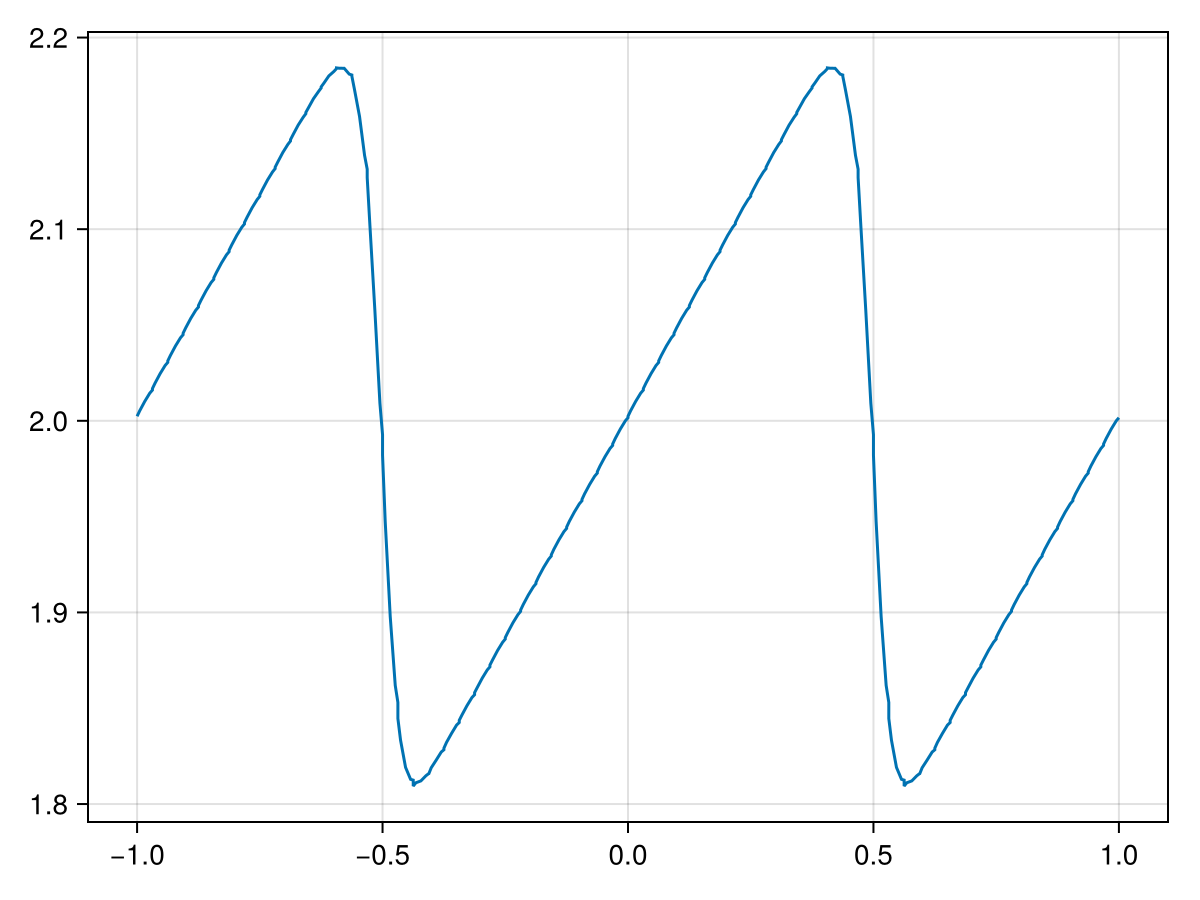

In [76]:
lines(vec(x), sol(2.0))